In [1]:
print('\nEnabling interactive shell outputs ...')
print('   Use command pass; to disable cell text outputs')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs


## Linear Regression 1

In [2]:
import pandas as pd
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = {'Strength':[160,171,175,182,184,181,188,193,195,200],'Percent_Hardwood':[10,15,15,20,20,20,25,25,28,30]}
df = pd.DataFrame(data)
df.head(10)

,Strength,Percent_Hardwood
0,160,10
1,171,15
2,175,15
3,182,20
4,184,20
5,181,20
6,188,25
7,193,25
8,195,28
9,200,30


In [4]:
Y = df.Strength
X = df.Percent_Hardwood

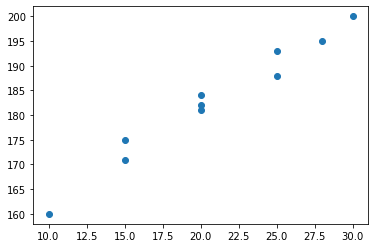

In [5]:
plt.scatter(X,Y)
plt.show()

In [6]:
formula = 'Strength ~ Percent_Hardwood'
tensile_lm = ols(formula, data=df).fit()

In [7]:
y_predict = tensile_lm.predict(X)

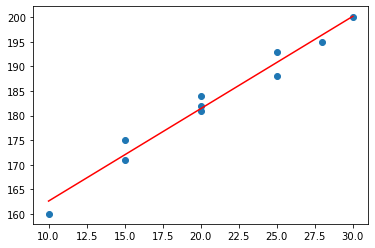

In [8]:
plt.plot(X,y_predict, c="r")
plt.scatter(X,Y)
plt.show()

In [9]:
# Making prediction

Xk = X.iloc[[4]]
print(Xk)

Xreg_k = sm.add_constant(Xk, has_constant='add') 
print(Xreg_k)

Yk = np.array(tensile_lm.predict(exog=Xreg_k))
print("Y_predict : ",Yk)

4    20
Name: Percent_Hardwood, dtype: int64
   const  Percent_Hardwood
4    1.0                20
Y_predict :  [181.39709172]


In [10]:
print("Sum of Squared Errors (SSE): {:.2f}".format(tensile_lm.ssr)) # Sum of Squares Residuals
print("Sum of Squared Regression (SSR): {:.2f}".format(tensile_lm.ess)) # Explained sum of squares
print("Sum of Squared Total (SST): {:.2f}".format(tensile_lm.centered_tss)) # Total sum of squares
print("Residual df (n-p): {:.0f}".format(tensile_lm.df_resid))
print("Mean Squared errors (MSE): {:.2f}".format(tensile_lm.mse_resid))
print("Standard Errors (Se): {:.2f}".format(np.sqrt(tensile_lm.mse_resid)))

Sum of Squared Errors (SSE): 38.83
Sum of Squared Regression (SSR): 1262.07
Sum of Squared Total (SST): 1300.90
Residual df (n-p): 8
Mean Squared errors (MSE): 4.85
Standard Errors (Se): 2.20


In [11]:
print("R-squared: {:.3f}".format(tensile_lm.rsquared))
print("Adjusted R-squared: {:.3f}".format(tensile_lm.rsquared_adj))

R-squared: 0.970
Adjusted R-squared: 0.966


In [12]:
tensile_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:                OLS              Adj. R-squared:     0.966   
Dependent Variable:   Strength         AIC:                45.9456 
Date:                 2021-10-06 15:34 BIC:                46.5507 
No. Observations:     10               Log-Likelihood:     -20.973 
Df Model:             1                F-statistic:        260.0   
Df Residuals:         8                Prob (F-statistic): 2.20e-07
R-squared:            0.970            Scale:              4.8541  
-------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept        143.8244   2.5215 57.0386 0.0000 138.0097 149.6390
Percent_Hardwood   1.8786   0.1165 16.1245 0.0000   1.6100   2.1473
-------------------------------------------------------------------
Omnibus:                1.211        Durbin-Watson:           2.132
Prob(Omnibus):          0.546        Jarque-Bera (JB):        0.701
Skew:                   0.157        Prob(JB):                0.704
Kurtosis:               1.742        Condition No.:           78   
===================================================================

"""

**ข้อ 2**

In [13]:
#!gdown --id 1urdu6mBbYDoMtktmqNwLRzKh0fr6I5f5

In [15]:
co_smoke = pd.read_excel("data/lect02-lin-reg.xlsx", sheet_name="CO-smoke",header=0)

In [16]:
co_smoke.head()

,TAR,NICOTINE,WEIGHT,CO
0,14.1,0.86,0.9853,13.6
1,16.0,1.06,1.0938,16.6
2,29.8,2.03,1.1650,23.5
3,8.0,0.67,0.9280,10.2
4,4.1,0.40,0.9462,5.4


In [17]:
co_smoke.describe()

,TAR,NICOTINE,WEIGHT,CO
count,25.00000,25.000000,25.000000,25.000000
mean,12.21600,0.876400,0.970284,12.528000
std,5.66581,0.354058,0.087721,4.739684
min,1.00000,0.130000,0.785100,1.500000
25%,8.60000,0.690000,0.922500,10.000000
50%,12.80000,0.900000,0.957300,13.000000
75%,15.10000,1.020000,1.007000,15.400000
max,29.80000,2.030000,1.165000,23.500000


In [18]:
Y = co_smoke.CO
X = co_smoke.drop("CO",axis=1)

In [19]:
formula = 'CO ~ TAR + NICOTINE + WEIGHT'

In [20]:
co_smoke_lm = ols(formula,data=co_smoke).fit()

In [21]:
co_smoke_lm.params

Intercept    3.202190
TAR          0.962574
NICOTINE    -2.631661
WEIGHT      -0.130482
dtype: float64

In [22]:
print("Sum of Squared Errors (SSE): {:.2f}".format(co_smoke_lm.ssr)) # Sum of Squares Residuals
print("Sum of Squared Regression (SSR): {:.2f}".format(co_smoke_lm.ess)) # Explained sum of squares
print("Sum of Squared Total (SST): {:.2f}".format(co_smoke_lm.centered_tss)) # Total sum of squares
print("Residual df (n-p): {:.0f}".format(co_smoke_lm.df_resid))
print("Mean Squared errors (MSE): {:.2f}".format(co_smoke_lm.mse_resid))
print("Standard Errors (Se): {:.2f}".format(np.sqrt(co_smoke_lm.mse_resid)))

Sum of Squared Errors (SSE): 43.89
Sum of Squared Regression (SSR): 495.26
Sum of Squared Total (SST): 539.15
Residual df (n-p): 21
Mean Squared errors (MSE): 2.09
Standard Errors (Se): 1.45


In [23]:
print("R-squared: {:.3f}".format(tensile_lm.rsquared))
print("Adjusted R-squared: {:.3f}".format(tensile_lm.rsquared_adj))

R-squared: 0.970
Adjusted R-squared: 0.966


<AxesSubplot:xlabel='TAR', ylabel='CO'>

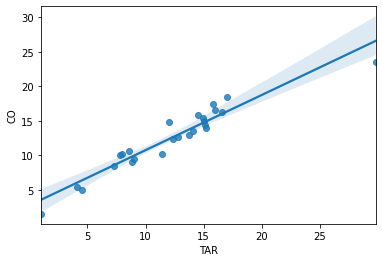

In [24]:
sns.regplot(x="TAR" , y="CO", data= co_smoke)

<AxesSubplot:xlabel='NICOTINE', ylabel='CO'>

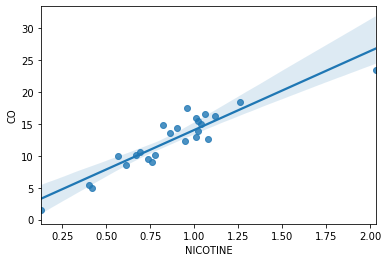

In [25]:
sns.regplot(x="NICOTINE" , y="CO", data= co_smoke)

<AxesSubplot:xlabel='WEIGHT', ylabel='CO'>

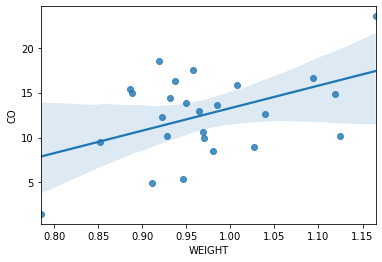

In [26]:
sns.regplot(x="WEIGHT" , y="CO", data= co_smoke)

In [27]:
co_smoke_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.907   
Dependent Variable: CO               AIC:                93.0187 
Date:               2021-10-06 15:35 BIC:                97.8942 
No. Observations:   25               Log-Likelihood:     -42.509 
Df Model:           3                F-statistic:        78.98   
Df Residuals:       21               Prob (F-statistic): 1.33e-11
R-squared:          0.919            Scale:              2.0901  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept     3.2022    3.4618   0.9250  0.3655   -3.9969  10.4013
TAR           0.9626    0.2422   3.9736  0.0007    0.4588   1.4663
NICOTINE     -2.6317    3.9006  -0.6747  0.5072  -10.7433   5.4800
WEIGHT       -0.1305    3.8853  -0.0336  0.9735   -8.2105   7.9495
-----------------------------------------------------------------
Omnibus:               0.052        Durbin-Watson:          2.860
Prob(Omnibus):         0.974        Jarque-Bera (JB):       0.223
Skew:                  -0.087       Prob(JB):               0.895
Kurtosis:              2.572        Condition No.:          242  
=================================================================

"""

In [28]:
formula1 = 'CO ~ NICOTINE + WEIGHT'
co_smoke_lm1 = ols(formula1, data=co_smoke).fit()

In [29]:
co_smoke_lm1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.844   
Dependent Variable: CO               AIC:                105.0357
Date:               2021-10-06 15:35 BIC:                108.6924
No. Observations:   25               Log-Likelihood:     -49.518 
Df Model:           2                F-statistic:        66.13   
Df Residuals:       22               Prob (F-statistic): 4.97e-10
R-squared:          0.857            Scale:              3.4952  
------------------------------------------------------------------
               Coef.   Std.Err.    t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept      1.6140    4.4466  0.3630  0.7201   -7.6078  10.8357
NICOTINE      12.3881    1.2447  9.9524  0.0000    9.8067  14.9695
WEIGHT         0.0588    5.0240  0.0117  0.9908  -10.3602  10.4779
-----------------------------------------------------------------
Omnibus:              0.376        Durbin-Watson:           2.676
Prob(Omnibus):        0.829        Jarque-Bera (JB):        0.520
Skew:                 0.215        Prob(JB):                0.771
Kurtosis:             2.440        Condition No.:           30   
=================================================================

"""